<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Exercise.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Exercise: Statistics: Sample vs. population metrics
© ExploreAI Academy

In this notebook, we will present a series of code exercises that will test and enhance your understanding of sample and population metrics, the Central Limit Theorem (CLT), and confidence intervals.

## Learning objectives

By the end of this notebook, you should be able to:
- Differentiate between sample and population metrics,
- Understand where the Central Limit theorem is utilised, and
- Describe the function and measurement of confidence intervals.

## Exercises

Suppose we are data scientists working for an environmental organisation. Our task is to analyse data related to forest areas across different regions to help formulate conservation strategies. The dataset includes forest areas (in square kilometers) from over 1000 regions worldwide.

### Exercise 1

We are working with a dataset that contains information about different species found in national parks around the world. The dataset includes data on the number of individual animals of each species found in these parks.

Task: Calculate the population mean (`population_mean`) and variance (`population_variance`) of the species count.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generating random data. Fixed seed for reproducibility
np.random.seed()
forest_areas = np.random.randint(500, 10000, size=1000)  # Forest areas in sq km
regions = ['Region' + str(i) for i in range(1, 1001)]

# Creating a dictionary
data = {'Region': regions, 'Forest_Area': forest_areas}

# Converting to a pandas DataFrame
df = pd.DataFrame(data)

# insert code here
df.head()

# Calculating the population mean 
pop_mean = df['Forest_Area'].mean()
pop_var = df['Forest_Area'].var(ddof=0)

print(f'Population Mean for the # of Species: {pop_mean}\nVariance: {pop_var} ')

Population Mean for the # of Species: 5274.563
Variance: 7372286.656031002 


### Exercise 2

Select a random sample of 30 regions from the dataset and calculate sample mean and variance. Compare these with population metrics.

In [36]:
# insert code here
# Select 30 regions
sample = df.sample(300)

# Sample Mean
sample_mean = sample['Forest_Area'].mean()

# Sample Variance 
sample_var = sample['Forest_Area'].var(ddof=1)

print(f'Sample mean: {sample_mean}\nSample Variance: {sample_var}')

print(f'Population Mean for the # of Species: {pop_mean}\nVariance: {pop_var} ')

sample['Forest_Area'].max()

Sample mean: 5474.62
Sample Variance: 7562281.320000001
Population Mean for the # of Species: 5274.563
Variance: 7372286.656031002 


9949

### Exercise 3

Demonstrate the Central Limit Theorem (CLT) by plotting the distribution of sample means.

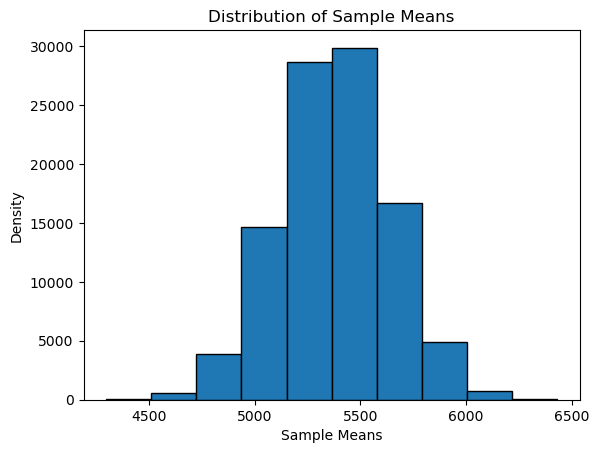

In [24]:
# insert code here
sample_means = [df['Forest_Area'].sample(100).mean() for i in range(1,100001)]

# len(sample_means)

#Plotting
plt.hist(sample_means, bins=10, edgecolor='Black')
plt.xlabel('Sample Means')
plt.ylabel('Density')
plt.title('Distribution of Sample Means')
plt.show()

### Exercise 4

Calculate a 95% confidence interval for the mean of a sample.

In [38]:
# insert code here
import scipy.stats as stat

# Sample Mean 
X_Bar = sample['Forest_Area'].mean()

#SE
DOF = len(sample['Forest_Area']) - 1
SE = stat.sem(sample['Forest_Area'])

#CI
stat.t.interval(0.95, DOF, X_Bar ,SE)





(5162.173718353308, 5787.066281646692)

In [25]:
help('stats.t.interval')

No Python documentation found for 'stats.t.interval'.
Use help() to get the interactive help utility.
Use help(str) for help on the str class.



In [31]:
sample

,Region,Forest_Area
77,Region78,4262
118,Region119,7094
848,Region849,2114
621,Region622,7334
866,Region867,1095
887,Region888,2886
296,Region297,2305
156,Region157,8716
506,Region507,6602
764,Region765,1401


## Solutions

### Exercise 1

The population mean and variance are calculated on the entire dataset. Here, `ddof=0` is used in variance calculation since it's the population variance.


In [ ]:
# Calculate the population_mean and population_variance
population_mean = df['Forest_Area'].mean()
population_variance = df['Forest_Area'].var(ddof=0)

print("Population Mean:", population_mean)
print("Population Variance:", population_variance)

### Exercise 2

In [ ]:
# Select a random sample of 30 regions and calculate sample metrics
sample = df.sample(30)
sample_mean = sample['Forest_Area'].mean()
sample_variance = sample['Forest_Area'].var(ddof=1)

print("Sample mean:", sample_mean)
print("Sample variance:", sample_variance)

# Comparison with Population Metrics
print("\nComparison:")
print("Difference in means:", population_mean - sample_mean)
print("Difference in variances:", population_variance - sample_variance)


In the code snippet above:
* `df.sample(30)` randomly picks 30 entries from the DataFrame `df`. This subset represents a sample of the entire population (all regions in the dataset).
* `sample_mean` is the average forest area across the 30 randomly selected regions. 
* `sample_variance` measures how much the forest areas in our sample vary or spread out from the sample mean. The parameter `ddof=1` (degrees of freedom) is used here to make the variance estimate unbiased. 
* When calculating variance for a sample, dividing by `N-1` (where `N` is the sample size) instead of `N` corrects for the fact that we are working with a sample, not the entire population. This adjustment is known as **Bessel's correction**.
* **Difference in means** is the difference between the population mean and the sample mean. It shows how the average forest area of our sample compares to the average forest area of the entire dataset.
* **Difference in variances** is the difference between the population variance and the sample variance. It indicates how the variability of forest areas in our sample compares to the variability in the entire dataset.

### Exercise 3

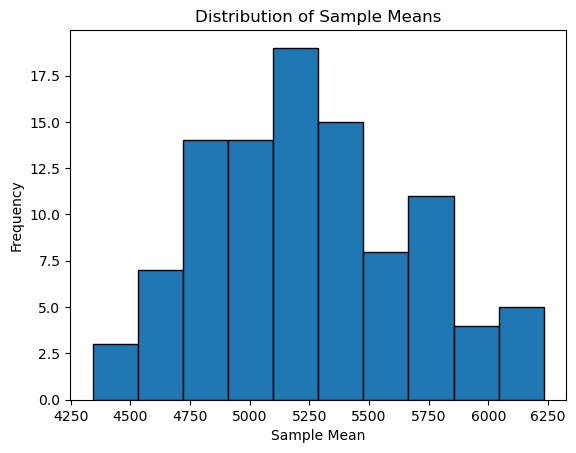

In [39]:
import matplotlib.pyplot as plt

# Take 100 samples of size 30 and plot their mean distribution
sample_means = [df['Forest_Area'].sample(30).mean() for _ in range(100)]

plt.hist(sample_means, bins=10, edgecolor='black')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Means')
plt.show()


The distribution of sample means will approximate a normal distribution, as evidenced by the histogram, even if the population distribution is not normal.

### Exercise 4 

In [ ]:
import scipy.stats as stats

# Select a sample (reuse sample from Exercise 2 or select a new one)
sample_data = sample['Forest_Area']

# Calculate 95% confidence interval for the sample mean
mean = np.mean(sample_data)
standard_error = stats.sem(sample_data)
confidence_level = 0.95
degrees_freedom = len(sample_data) - 1
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, mean, standard_error)

print("95% Confidence Interval:", confidence_interval)


#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>